### Wykres strumieni

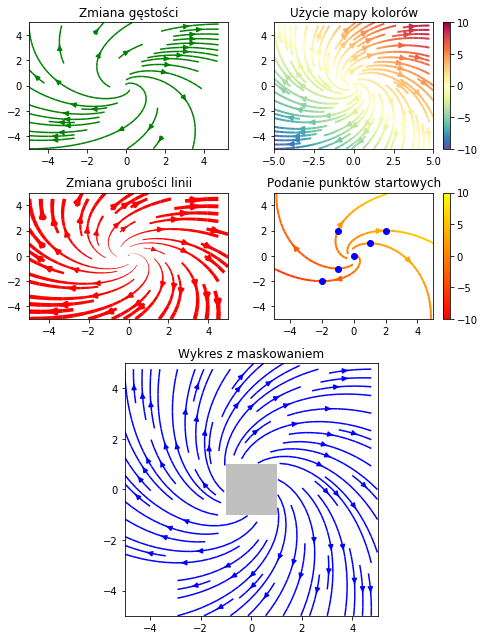

In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import math

w = 5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = X+Y
V = Y-X
speed = np.sqrt(U**2 + V**2)

fig = plt.figure (figsize=(7,9))

gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1,1,2])

ax0 = fig.add_subplot(gs[0,0])
ax0.streamplot(X,Y,U,V, density=[0.25,1], color='g')
ax0.set_title('Zmiana gęstości')

ax1 = fig.add_subplot(gs[0,1])
strm = ax1.streamplot(X,Y,U,V, color=U, linewidth=2, cmap='Spectral_r')
fig.colorbar(strm.lines)
ax1.set_title('Użycie mapy kolorów')

ax2 = fig.add_subplot(gs[1,0])
lw = 5*speed / speed.max()
ax2.streamplot(X,Y,U,V, density=0.6, color='r', linewidth=lw)
ax2.set_title('Zmiana grubości linii')

start_points = np.array([[-2,-1,0,1,2,-1],[-2,-1,0,1,2,2]])
ax3 = fig.add_subplot(gs[1,1])
strm = ax3.streamplot(X,Y,U,V, color=U, linewidth=2, 
                      cmap='autumn', start_points=start_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Podanie punktów startowych')

ax3.plot(start_points[0], start_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:,:])
ax4.streamplot(X,Y,U,V, color='b')
ax4.set_title('Wykres z maskowaniem')

ax4.imshow(~mask, extent=(-w,w,-w,w), alpha=0.25,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()